<a href="https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰 サンプルプログラム

## データの準備と確認

In [1]:
# iris データセットの読み込んで概要を表示
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


In [2]:
#  irisデータをデータフレームに編入 / ターゲットの 0,1,2 は名称に変更
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 訓練データとして、ガクの長さ(0)、花弁の長さ(2) のみ使用
X = iris.data[:, [0, 2]] 
y = iris.target

## 境界表示のための汎用プログラムの準備

decision_boundary

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# graph common settings
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def decision_boundary(clf, X, y, ax, title):
    # classifier
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # label
    ax.set_title(title)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('petal length')

## ロジスティック回帰による分類

* C は正則化の度合いを調整するパラメータで、C を大きくすると正則化が弱くなり過学習気味に、逆に小さすぎるとデータの特徴を大雑把にしか獲得できなくなります。
* 一般に、ロジスティック回帰などの線形モデル（決定境界が直線）は高速なため、高次元(特徴量の数が多い)のデータに対して有効です。


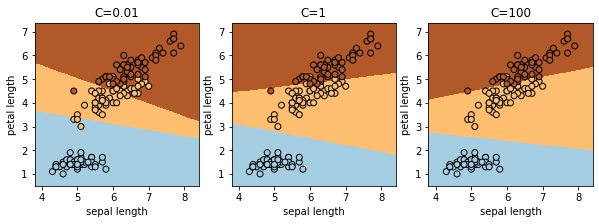

In [6]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LogisticRegression(C=C)
    decision_boundary(clf, X, y, ax, title)